## Homework 9 - Time Series

In [421]:
import numpy as np
import pandas as pd
import os
import pylab as pl
%pylab inline

PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [450]:
# Testing...

x = np.array([[[ 0,  1,  2, 3],
        [ 3,  4,  5, 6]],
       [[ 9, 10, 11, 1],
        [12, 13, 14, 1]],
       [[18, 19, 20, 1],
        [21, 22, 23, 1]]])

In [451]:
print x.shape
print x

(3, 2, 4)
[[[ 0  1  2  3]
  [ 3  4  5  6]]

 [[ 9 10 11  1]
  [12 13 14  1]]

 [[18 19 20  1]
  [21 22 23  1]]]


In [147]:
xprod = np.prod(x, axis = 1)
xprod

array([[  0,   4,  10,  18],
       [108, 130, 154,   1],
       [378, 418, 460,   1]])

In [151]:
np.prod([[False, True],[True, True]], axis=1)

array([0, 1])

### In this analysis we're working with New York City MTA card swipe data from 600 subway stations across the city. Data for each station is broken out into 23 different transit card types, and represents weekly swipe totals over a total duration of 194 weeks.

In [14]:
# Grab the file from location on github and transfer to PUIdata directory on compute
!curl -O 'https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy'
os.system('mv ' + 'MTA_Fare.npy ' + PUIdata)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32437    0 32437    0     0  94402      0 --:--:-- --:--:-- --:--:--  270k


0

In [422]:
# Load the data and double check its shape
mtadata = np.load(PUIdata + "/MTA_Fare.npy")
mtadata.shape

(600, 23, 194)

Data cube axes:
    
1. 600 subway stations
2. Data for 23 card types swiped at each station
3. Number of swipes for each card type across 194 weeks

## Task 1: Event Detection

Detect without collapsing card type

In [ ]:
mtadata = mtadata.astype('float')
mtadata[mtadata==-1] = np.nan
mtadata[0,0]

In [ ]:
len(np.nanmean(mtadata, axis=2))
np.nanmean(mtadata, axis=2).shape
passtype_mean = np.nanmean(mtadata, axis=2)

In [ ]:
passtype_std = np.nanstd(mtadata, axis=2)

In [ ]:
thresholds = [passtype_mean + 3 * passtype_std, 
              passtype_mean - 3 * passtype_std]

In [ ]:
pl.figure(figsize=(10,6))
pl.plot(mtadata[0][0], lw=0.5)

In [ ]:
print thresholds[0].shape
thresholds[0][1]

In [ ]:
high = thresholds[0][:,:, np.newaxis]
low = thresholds[1][:,:, np.newaxis]
# low = thresholds[1].reshape(600, 23, 1)

events = mtadata < low
events.shape
events[0]

In [ ]:
print events[0][0]
print events[0][1]
print events.shape

print events[0][0] * events[0][1] * events[0][2]
events_all = np.prod(events, axis=1)
print events_all[0]

In [ ]:
allcardmean = np.nanmean(mtadata, axis=1)
allcardmean.shape
allstationmean = np.nanmean(cardmean, axis=0)
allstationmean.shape

In [ ]:
allstationstd = np.nanstd(allstationmean)
allweeksmean = np.nanmean(allstationmean)
threshold = allweeksmean - 3 * allstationstd
events = allstationmean < threshold
events

In [ ]:
np.argwhere(events==True)

In [ ]:
weeks = pd.date_range(start='20100521', end='20140221', freq='W')
weeks[126]

Collapse card type for each station by averaging

In [541]:
mtadata = mtadata.astype('float')
mtadata[mtadata==-1] = np.nan

cards_mean = np.nansum(mtadata, axis=1)
cards_mean.shape
# cards_mean[np.isnan(cards_mean)]

(600, 194)

In [542]:
# Now we have one data point for each station, for each of the 194 weeks.
# We are classifying an extreme event as +- 3 sigma from the mean
# We want to find the week where such an event occurs in all time series (each station)

# Get the mean for all weeks at each station
station_mean = np.nanmean(cards_mean, axis=1)
station_mean.shape

# Get the standard deviation across all weeks at each station
station_std = np.nanstd(cards_mean, axis=1)
station_std.shape


(600,)

In [549]:
# Define the 3 sigma thresholds for each 
high = station_mean + 3 * station_std
low = station_mean - 3 * station_std
high = high.reshape(600, 1)
low = low.reshape(600, 1)

# Identify the extreme event(s) for each station as boolean array 
low_events = cards_mean < low
high_events = cards_mean > high
low_events.shape

# use np.where?

universal_low = np.prod(low_events, axis=0)
# universal_high = 


In [ ]:
# universal_low = np.prod(low_events, axis=0) 
# universal_high = np.prod(high_events, axis=0)
# universal_low > 0

## Task 2: Trend Identification

Here we collapse the stations (treat data like one big station) by averaging. This gives is 23 card type time series over 194 weeks.

In [465]:
stations_mean = np.nanmean(mtadata, axis=0)
stations_mean.shape

(23, 194)

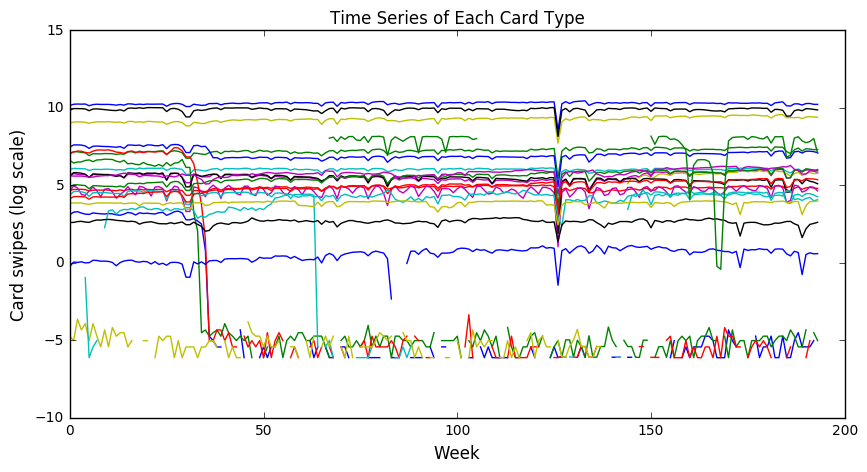

In [470]:
# Plotting each card type to get a sense of the data
pl.figure(figsize=(10,5))
for i in allstationmean:
    pl.plot(log(i)) 
pl.xlabel("Week", fontsize=12)
pl.ylabel("Card swipes (log scale)", fontsize=12)
pl.title('Time Series of Each Card Type')

# pl.legend(fontsize=15)

In [471]:
# Card type names
cardtypes = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [472]:
# Use pandas dataframe to attach card type names to data (and so we can use "rolling" function in next step)
card_data = pd.DataFrame(stations_mean.T, columns=cardtype)
print len(card_data)
card_data.head()

194


,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,24880.119048,1148.320346,103.465368,403.790043,101.316017,8003.123377,18510.686147,21.781385,721.205628,1108.294372,...,266.523810,1710.194805,129.456710,61.084416,0.00000,269.898268,45.584416,13.264069,0.774892,NaN
1,27173.229935,1265.798265,111.683297,432.167028,139.594360,8637.327549,20577.861171,25.698482,613.351410,1253.845987,...,329.605206,1969.778742,150.127983,70.136659,0.00000,264.019523,47.006508,13.275488,1.028200,NaN
2,27573.708423,1266.077754,111.524838,431.248380,123.097192,8710.647948,20467.684665,26.516199,652.328294,1329.453564,...,327.295896,1974.349892,150.267819,70.449244,0.00000,263.889849,46.291577,14.017279,1.004320,NaN
3,27329.751620,1215.123110,112.447084,424.166307,80.840173,8710.049676,20410.542117,24.235421,659.855292,1309.438445,...,317.697624,1949.349892,147.082073,69.987041,0.00000,263.609071,46.717063,14.233261,1.045356,NaN
4,27607.099138,1182.883621,110.243534,420.006466,75.883621,8460.012931,20030.176724,22.661638,723.663793,1214.323276,...,297.172414,1843.907328,143.053879,68.821121,0.37931,258.137931,43.743534,13.605603,0.974138,NaN


In [473]:
# Calculate the rolling mean using a 10-week window
rolling = card_data.rolling(window=10, center=True).mean()
rolling

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,26679.372193,1152.538560,107.820192,411.905844,103.637043,8501.107718,19700.974263,23.728452,707.624325,1294.748398,...,296.671208,1823.782062,139.405325,67.433918,0.980480,261.157398,45.660588,14.317519,1.028908,NaN
6,26881.506058,1150.205875,108.093611,412.489964,105.362274,8582.284968,19719.980052,23.898687,713.034564,1327.363430,...,299.190627,1829.957376,140.106292,68.135455,3.772020,261.390131,45.769608,14.601958,1.058577,NaN
7,26810.872935,1135.628419,107.403514,409.717873,100.925036,8583.969024,19487.271737,23.634442,728.619898,1337.058572,...,294.137434,1806.965924,138.654270,67.876099,6.762753,263.384946,45.720035,14.856737,1.056188,NaN
8,26615.546179,1115.697848,106.458557,405.741207,94.924994,8563.930035,19247.443270,23.155725,732.418896,1328.000313,...,287.464404,1779.219322,136.838671,67.622572,9.062323,265.003918,45.698404,14.971784,1.036617,NaN
9,26558.988296,1105.197848,106.015793,403.411185,94.866895,8556.290510,19109.157093,22.842118,731.523216,1317.998585,...,283.065052,1761.605499,136.026576,67.826892,11.907031,268.863961,45.711795,15.033123,1.031649,NaN


In [483]:
# This gives us a rolling mean figure for rows 5 through 189 (due to the window we set)
# Now we create an array containing the ratio of the last rolling mean over the first
# The largest value will indicate the greatest positive trend, and the smallest the greates negative trend
# This is assuming that it is a trend and not a structure change to the time series

trend_ratio = np.empty(0,)
for i in rolling.columns:
    trend_ratio = np.append(trend_ratio, (rolling[i][189] / rolling[i][5]))

trend_ratio

array([  1.02319178e+00,   1.25372312e+00,   1.11283318e+00,
         9.35035543e-01,   1.03500761e+00,   1.39160673e+00,
         9.01033899e-01,   2.09707131e-04,   1.06999689e-05,
         1.50349633e-06,   8.19930128e-01,   1.21518958e+00,
         2.48324899e+04,   5.79508303e-01,   6.50466151e-01,
         2.59651761e+00,   2.91334838e+00,   7.03085649e+01,
         1.53423894e+00,   1.02287152e+00,   8.10114959e-01,
         1.66468393e+00,              nan])

In [494]:
# Since the data in the last column has a more limited timeframe, we'll use the first rolling mean that was
# calculated and fill it in manually

print rolling.iloc[:,-1].dropna().head()

72    3041.455746
73    2967.841102
74    2981.069194
75    3074.827958
76    3085.360211
Name: stud, dtype: float64


In [498]:
# The first number is in row 72, so we'll use that to calculate the ratio of the shorter time series

trend_ratio[-1] = rolling.iloc[189,-1] / rolling.iloc[72,-1]
trend_ratio

array([  1.02319178e+00,   1.25372312e+00,   1.11283318e+00,
         9.35035543e-01,   1.03500761e+00,   1.39160673e+00,
         9.01033899e-01,   2.09707131e-04,   1.06999689e-05,
         1.50349633e-06,   8.19930128e-01,   1.21518958e+00,
         2.48324899e+04,   5.79508303e-01,   6.50466151e-01,
         2.59651761e+00,   2.91334838e+00,   7.03085649e+01,
         1.53423894e+00,   1.02287152e+00,   8.10114959e-01,
         1.66468393e+00,   7.60161465e-01])

[12 16 17  7  8  9]


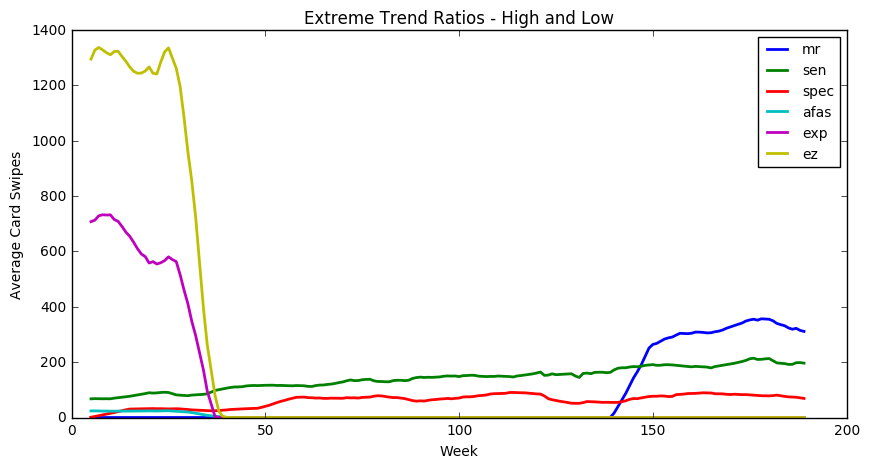

In [552]:
# Let's analyze the 3 largest and 3 smallest ratios visually

# Create an array with indices of largest and smallest values
indices = np.where(trend_ratio > np.sort(trend_ratio)[-4])[0]
indices = np.append(indices, np.where(trend_ratio < np.sort(trend_ratio)[3])[0])
print indices

pl.figure(figsize=(10,5))
for i in indices:
    pl.plot(rolling.iloc[:,i], lw=2)

pl.legend(loc='upper right', fontsize=10)
pl.xlabel('Week')
pl.ylabel('Average Card Swipes')
pl.title('Extreme Trend Ratios - High and Low')

In [517]:
# Check rolling variance to identify "constant trend"?

It appears that only two of these ratios represent time series covering the entire duration of the data, i.e. there is no structural change involved. These two are both positive trends (red and green lines above). Let's try to identify the trend ratios that aren't caused by structural changes in the data.

In [536]:
import statsmodels.api as sm

y = rolling['spec'][5:190]
x = np.arange(185)
y

### Might want to drop all nans ahead of time to make it simpler

linmodel1 = sm.OLS(y, sm.add_constant(x)).fit()
linmodel2 = sm.OLS(rolling['mr'][5:190], sm.add_constant(x)).fit()
# linmodel.summary()

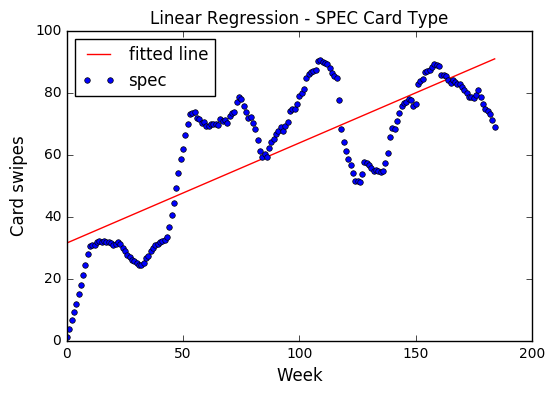

In [540]:
beta0_sm, beta1_sm = linmodel1.params

pl.figure(figsize=(6,4))
pl.plot(x, x * beta1_sm + beta0_sm, 'r', label = 'fitted line')
pl.plot(x, y, 'o', ms=4)

pl.xlabel('Week', fontsize=12)
pl.ylabel('Card swipes', fontsize=12)
pl.title('Linear Regression - SPEC Card Type')
pl.legend(loc='upper left')

In [538]:
# Explained sum of squares and total mean squared error
# Create a table?
# Do visual inspection first and come back if you have time

print linmodel1.ess, linmodel2.ess
print linmodel1.mse_total, linmodel2.mse_total

54976.9900434 1878163.16855
503.263240648 17600.6110478


## Task 2: Trend Identification

Here we collapse the stations (treat data like one big station) by summing. This gives us 23 card type time series over 194 weeks.

In [553]:
stations_sum = np.nansum(mtadata, axis=0)
stations_sum.shape

(23, 194)

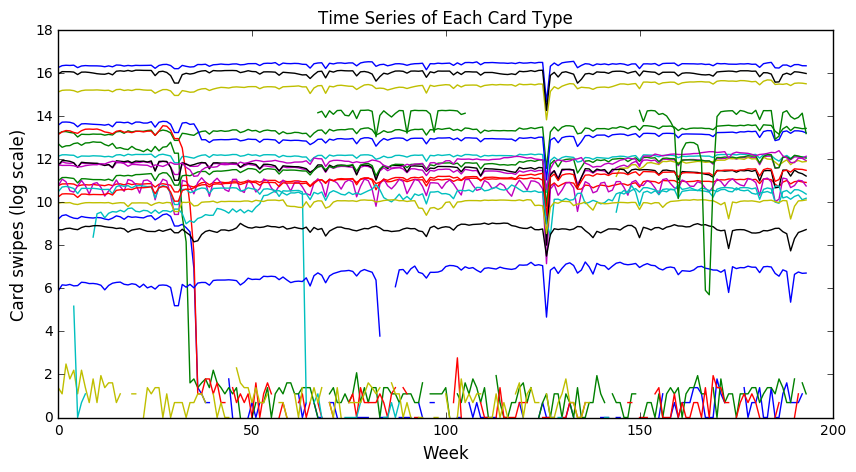

In [554]:
# Plotting each card type to get a sense of the data
pl.figure(figsize=(10,5))
for i in stations_sum:
    pl.plot(log(i)) 
pl.xlabel("Week", fontsize=12)
pl.ylabel("Card swipes (log scale)", fontsize=12)
pl.title('Time Series of Each Card Type')

# pl.legend(fontsize=15)

In [471]:
# Card type names
cardtypes = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [555]:
# Use pandas dataframe to attach card type names to data (and so we can use "rolling" function in next step)
card_data = pd.DataFrame(stations_sum.T, columns=cardtype)
print len(card_data)
card_data.head()

194


,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
1,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
3,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
4,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0


In [592]:
# Calculate the rolling mean using a 10-week window
rolling = card_data.rolling(window=10, center=True).mean()
# rolling

In [593]:
# This gives us a rolling mean figure for rows 5 through 189 (due to the window we set)
# Now we create an array containing the ratio of the last rolling mean over the first
# The largest value will indicate the greatest positive trend, and the smallest the greates negative trend
# This is assuming that it is a trend and not a structure change to the time series

trend_ratio = np.empty(0,)

rolling = rolling.iloc[5:190,:]
rolling = rolling.reset_index(drop=True)

# The last column/card type is an obvious structural change, so we'll drop that now
rolling = rolling.drop('stud', axis=1)

# Create the array of trend ratios
for i in rolling.columns:
    trend_ratio = np.append(trend_ratio, (rolling[i][184] / rolling[i][0]))

trend_ratio

array([  1.02179793e+00,   1.25206505e+00,   1.11134514e+00,
         9.33803360e-01,   1.03378708e+00,   1.38974760e+00,
         8.99841342e-01,   2.09446969e-04,   1.06870327e-05,
         1.50195580e-06,   8.18802130e-01,   1.21354056e+00,
         2.47849310e+04,   5.78722385e-01,   6.49608431e-01,
         2.59295989e+00,   2.90939677e+00,   7.01823789e+01,
         1.53227106e+00,   1.02158903e+00,   8.09063882e-01,
         1.66232675e+00])

[12 16 17  7  8  9]


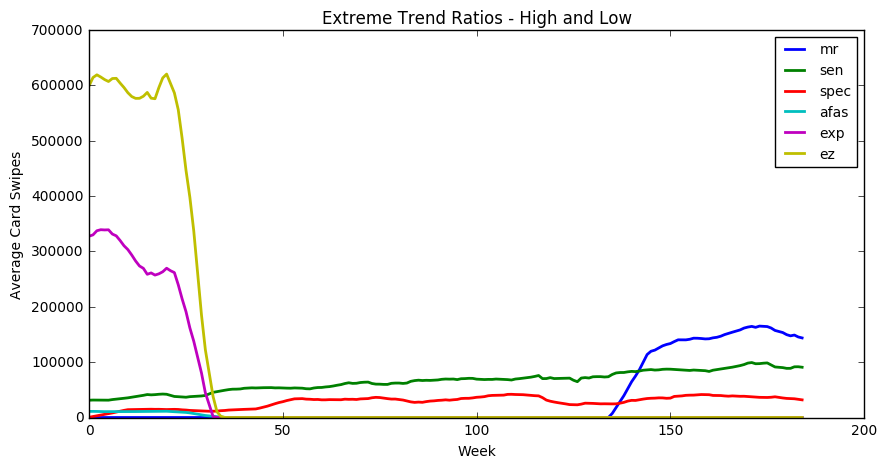

In [591]:
# Let's analyze the 3 largest and 3 smallest ratios visually

# Create an array with indices of largest and smallest values
indices = np.where(trend_ratio > np.sort(trend_ratio)[-4])[0]
indices = np.append(indices, np.where(trend_ratio < np.sort(trend_ratio)[3])[0])
print indices

pl.figure(figsize=(10,5))
for i in indices:
    pl.plot(rolling.iloc[:,i], lw=2)

pl.legend(loc='upper right', fontsize=10)
pl.xlabel('Week')
pl.ylabel('Card swipes')
pl.title('Extreme Trend Ratios - High and Low')

In [517]:
# Check rolling variance to identify "constant trend"?

It appears that only two of these ratios represent time series with consistent trends throughout the entire duration of the data, i.e. there is no structural change involved. These two are both positive trends (red and green lines above). Some of the time series are at or near zero for most of the weeks, which probably means structural change so we'll get rid of those. Let's try to identify the trend ratios that aren't caused by structural changes in the data.

In [602]:
import statsmodels.api as sm

x = np.arange(185)

# Compare standard errors for a trend vs structure change
linmodel1 = sm.OLS(rolling['spec'], sm.add_constant(x)).fit()
linmodel2 = sm.OLS(rolling['mr'], sm.add_constant(x)).fit()
print linmodel1.bse[1]
print linmodel2.bse[1]

9.25690939912
54.9027174239


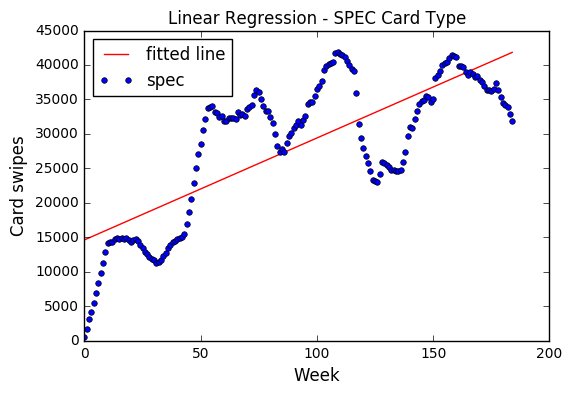

In [595]:
beta0_sm, beta1_sm = linmodel1.params

pl.figure(figsize=(6,4))
pl.plot(x, x * beta1_sm + beta0_sm, 'r', label = 'fitted line')
pl.plot(x, y, 'o', ms=4)

pl.xlabel('Week', fontsize=12)
pl.ylabel('Card swipes', fontsize=12)
pl.title('Linear Regression - SPEC Card Type')
pl.legend(loc='upper left')

In [612]:
rolling_cut = rolling.drop(['afas', 'exp', 'ez', 'mr'], axis=1)
rolling_cut.head()

,10t,14d,1d,2t,30d,7d,ada,ff,mc,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus
0,12347326.1,533376.2,49898.9,190627.5,47956.2,3934303.6,9117571.2,41254.9,131889.7,137296.4,844028.3,64516.0,31208.6,454.0,120860.6,21131.1,6626.3,476.2
1,12438021.8,532186.0,50014.6,190856.4,48741.4,3970926.0,9124481.8,41790.3,132944.0,138431.2,846704.1,64826.2,31525.9,1740.9,120940.9,21176.8,6756.1,489.8
2,12413400.0,525801.8,49727.9,189699.8,46724.4,3974298.6,9022678.5,41331.0,131174.8,136185.4,836627.0,64197.5,31426.6,3128.6,121945.7,21167.9,6878.3,489.0
3,12328087.8,516787.3,49310.8,187936.9,43959.0,3966722.6,8915251.8,40723.5,129916.9,133147.9,824119.7,63383.3,31322.8,4197.9,122751.3,21167.1,6934.6,480.1
4,12301901.5,511925.8,49105.8,186858.1,43932.1,3963185.5,8851225.3,40303.7,129063.0,131111.0,815964.5,63007.3,31417.4,5515.0,124538.5,21173.3,6963.0,477.8


[11 12 13  9 10 16]


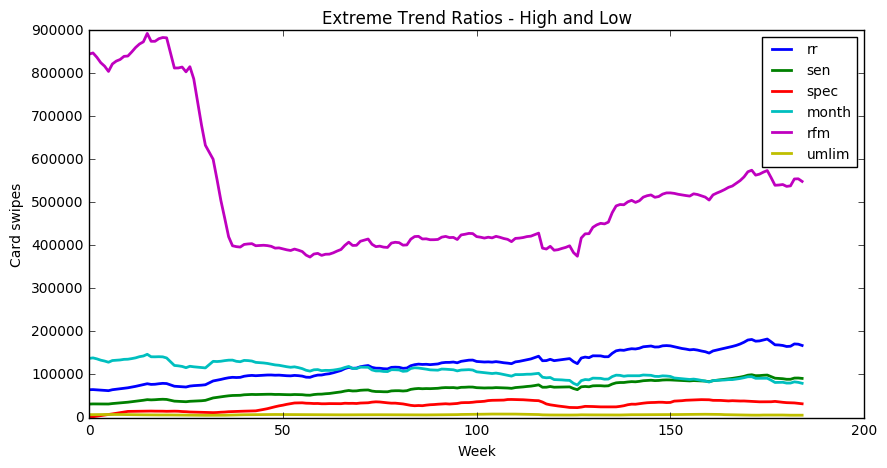

In [613]:
# Repeating the identification of high and low ratios with cut data

trend_ratio_cut = np.empty(0,)

# Create the array of trend ratios
for i in rolling_cut.columns:
    trend_ratio_cut = np.append(trend_ratio_cut, (rolling_cut[i][184] / rolling_cut[i][0]))

# Create an array with indices of largest and smallest values
indices = np.where(trend_ratio_cut > np.sort(trend_ratio_cut)[-4])[0]
indices = np.append(indices, np.where(trend_ratio_cut < np.sort(trend_ratio_cut)[3])[0])
print indices

pl.figure(figsize=(10,5))
for i in indices:
    pl.plot(rolling_cut.iloc[:,i], lw=2)

pl.legend(loc='upper right', fontsize=10)
pl.xlabel('Week')
pl.ylabel('Card swipes')
pl.title('Extreme Trend Ratios - High and Low')

Out of these six time series, 'rfm' is the only card type that exhibits structural change.

In [614]:
# We'll drop 'rfm' from the trend ratio array and get the max and min ratios.

rolling_cut = rolling_cut.drop(['rfm'], axis=1)

trend_ratio_cut = np.empty(0,)

for i in rolling_cut.columns:
    trend_ratio_cut = np.append(trend_ratio_cut, (rolling_cut[i][184] / rolling_cut[i][0]))

maxratio = np.sort(trend_ratio_cut)[-1]
minratio = np.sort(trend_ratio_cut)[0]
maxix = np.where(trend_ratio_cut == maxratio)
minix = np.where(trend_ratio_cut == minratio)

print "The card type with the biggest positive trend is " + str(rolling_cut.columns[maxix][0])
print "The card type with the biggest negative trend is " + str(rolling_cut.columns[minix][0])


The card type with the biggest positive trend is spec
The card type with the biggest negative trend is month


## Task 3: Identify Periodicity

Here we are interested in identifying the stations that show a prominent annual periodicity. We will sum the card types for each station to get the total swipes and analyze each station as a whole.

In [615]:
cards_sum = np.nansum(mtadata, axis=1)
cards_sum.shape

(600, 194)

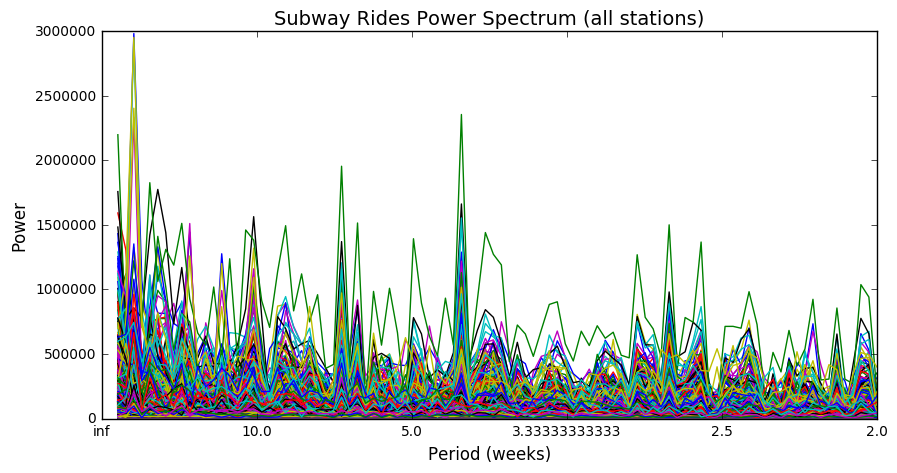

In [641]:
# Plot the power spectrum excluding first 2 frequencies (which are uninteresting because the represent infinity
# and the entire period of the data)
# X axis changed to period (weeks) for readability

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for i in range(len(cards_sum)):
    ax.plot(np.fft.rfftfreq(N, 1.0)[2:], np.abs(np.fft.rfft(cards_sum[i])[2:]))

# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, (start + end)/10)) 

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=10)
pl.xlabel("Period (weeks)", fontsize=12)
pl.ylabel("Power", fontsize=12)
pl.title("Subway Rides Power Spectrum (all stations)", fontsize=14)

In [675]:
# It looks like are some stations that spike around 52 weeks
## The max power figure for all time series is at the 52 week period, so let's find that index in the 
## fourier transform results and then find the 4 largest powers at that index

# Create a list with all 52-week period power values 
f_all = []
for i in range(len(cards_sum)):
    f_all.append(np.abs(np.fft.rfft(cards_sum[i])[71])) ### Figure out how to determine this index
print shape(f_all)
# print f_all
print max(f_all)

# Find the 4 biggest values (out of 600 stations)
# Get the indices of those 4 values in f (which should be the same as in axis 0 of mtadata)


(600,)
1499321.11353


In [371]:

f = np.abs(np.fft.rfft(allcardmean[0]))
f.shape
# print allcardmean[0]
# fig = pl.figure(figsize=(15,5))
# ax = fig.add_subplot(111)
# ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=20)
# ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
# ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
# pl.xlabel("frequency (1/week)", fontsize=20)

(98,)

In [340]:
np.where(allcardmean[0] == 'nan')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


(array([], dtype=int64),)

In [341]:
np.where(np.isnan(allcardmean[0]))

(array([128, 129]),)

In [ ]:
allcardmean[0][np.where(np.isnan(allcardmean[0]))] = 0
allcardmean[0]

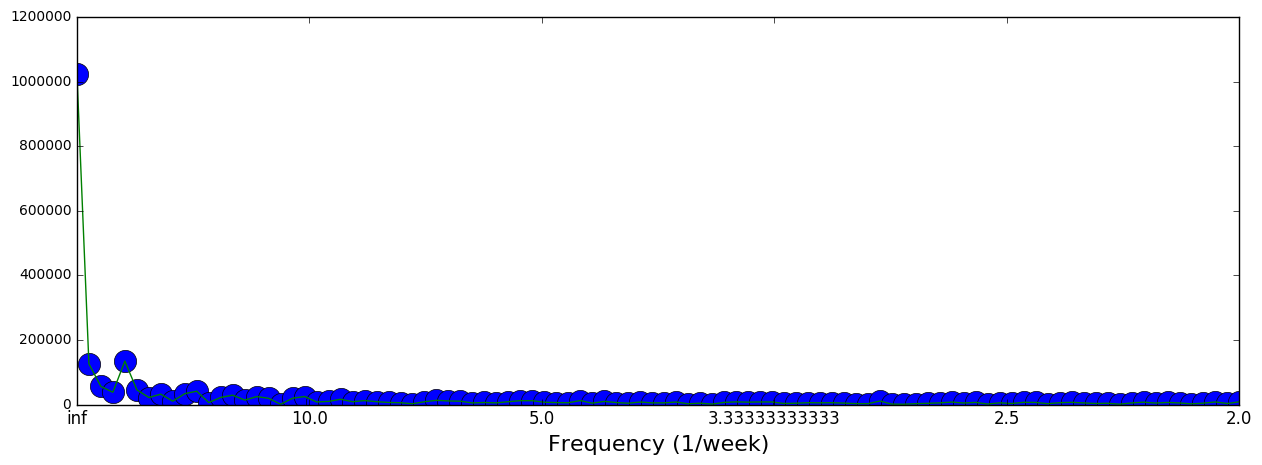

In [356]:
f = np.abs(np.fft.rfft(allcardmean[0]))
f

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=16)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=12)
pl.xlabel("Frequency (1/week)", fontsize=16)
# print (f)

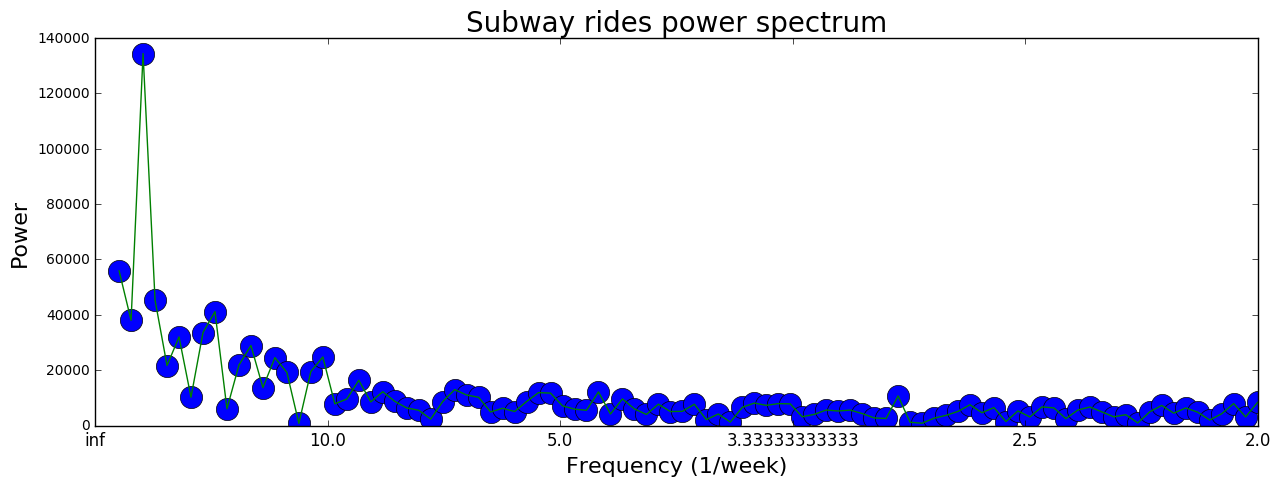

In [367]:
f = np.abs(np.fft.rfft(allcardmean[0]))

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[2:], (f[2:]), 'o', ms=16)
ax.plot(np.fft.rfftfreq(N, 1.0)[2:], (f[2:]), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=12)
pl.xlabel("Frequency (1/week)", fontsize=16)
pl.ylabel("Power", fontsize=16)
pl.title("Subway rides power spectrum", fontsize=18)

In [368]:
f = np.abs(np.fft.rfft(allcardmean[0]))
np.max(f[2:])

134375.99317277162

array([ 1695.72727273,  2112.        ,  2243.59090909,  2038.59090909,
        1886.77272727,  1620.63636364,  1908.59090909,  1904.95454545,
        1873.36363636,  1870.09090909,  1863.90909091,  1808.95454545,
        1752.09090909,  1722.13636364,  1415.18181818,  1887.59090909,
        1873.31818182,  1819.22727273,  1872.59090909,  1732.77272727,
        1866.04545455,  1854.13636364,  1794.59090909,  1752.18181818,
        1864.68181818,  1261.5       ,  1799.27272727,  1801.59090909,
        1747.5       ,  1387.36363636,   988.27272727,   988.09090909,
        1727.95454545,  1638.77272727,  1462.        ,  1593.22727273,
        1702.40909091,  1776.13636364,  1812.5       ,  1392.09090909,
        1765.18181818,  1949.45454545,  1905.36363636,  1768.13636364,
        1774.59090909,  1978.22727273,  1806.72727273,  1784.18181818,
        2025.5       ,  2045.27272727,  2002.68181818,  1798.54545455,
        1465.81818182,  1850.45454545,  1830.90909091,  1859.13636364,
      

In [390]:
f = np.abs(np.fft.rfft(allcardmean))
f.shape

(600, 98)

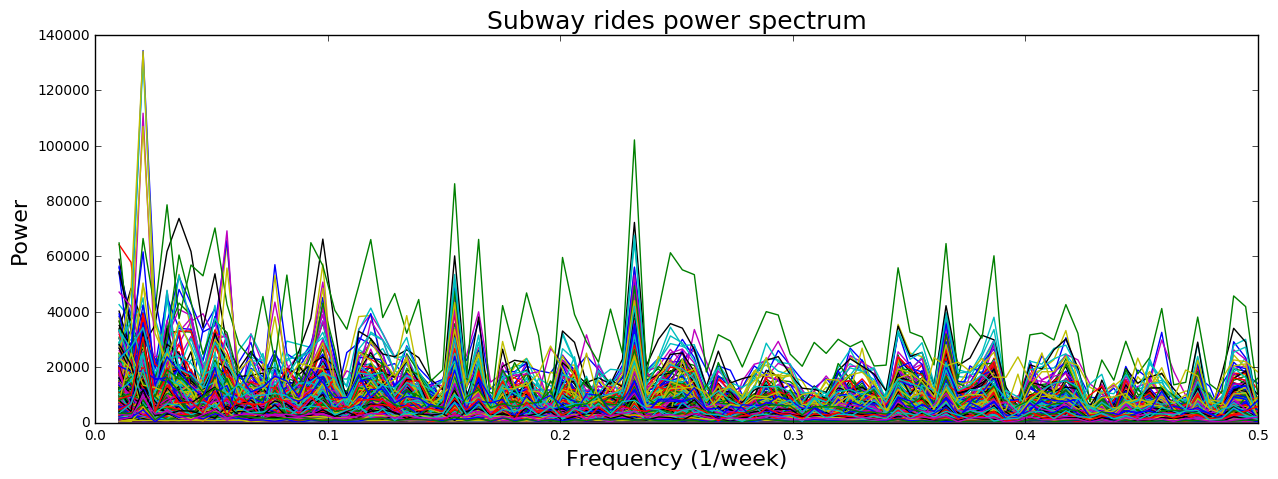

In [391]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for i in f:
#     ax.plot(np.fft.rfftfreq(N, 1.0)[2:], (i[2:]), 'o', ms=16)
    ax.plot(np.fft.rfftfreq(N, 1.0)[2:], (i[2:]), '-')

# ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=12)
pl.xlabel("Frequency (1/week)", fontsize=16)
pl.ylabel("Power", fontsize=16)
pl.title("Subway rides power spectrum", fontsize=18)

In [417]:
max_powers = [ i.max() for i in f ]
len(max_powers)

600

In [418]:
np.sort(max_powers)[-4:]

array([ 3368814.31027668,  3382257.79644269,  3468407.19762846,
        5390694.42094862])

In [420]:
max4 = np.sort(max_powers)[-4:]
for i in max4:
    print np.where(max_powers == i)
                
# np.where(max_powers[np.sort(max_powers)[-4:]])

(array([83]),)
(array([45]),)
(array([21]),)
(array([169]),)
